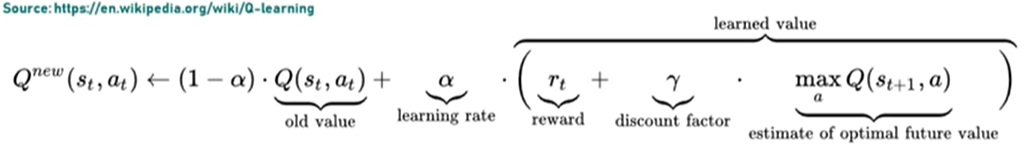

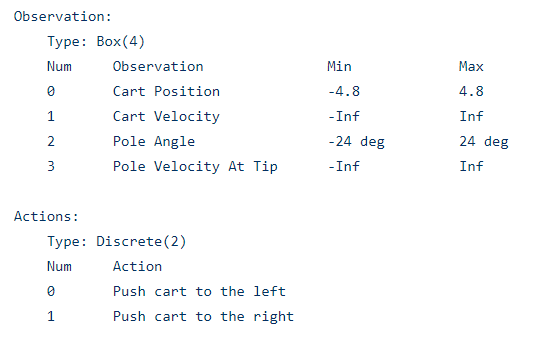

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import math

from jupyterthemes import jtplot
jtplot.style(theme='chesterish', grid = False)

Episode: 0, Max: 25.0, Ave: 25.0, Min: 25.0
Episode: 500, Max: 72.0, Ave: 23.548, Min: 9.0
Episode: 1000, Max: 93.0, Ave: 23.036, Min: 9.0
Episode: 1500, Max: 102.0, Ave: 24.524, Min: 9.0
Episode: 2000, Max: 109.0, Ave: 25.07, Min: 8.0
Episode: 2500, Max: 92.0, Ave: 24.39, Min: 9.0
Episode: 3000, Max: 112.0, Ave: 25.436, Min: 9.0
Episode: 3500, Max: 139.0, Ave: 26.29, Min: 9.0
Episode: 4000, Max: 123.0, Ave: 27.49, Min: 9.0
Episode: 4500, Max: 146.0, Ave: 28.868, Min: 9.0
Episode: 5000, Max: 165.0, Ave: 31.436, Min: 8.0
Episode: 5500, Max: 163.0, Ave: 30.144, Min: 8.0
Episode: 6000, Max: 155.0, Ave: 33.022, Min: 8.0
Episode: 6500, Max: 218.0, Ave: 31.068, Min: 8.0
Episode: 7000, Max: 224.0, Ave: 34.502, Min: 9.0
Episode: 7500, Max: 246.0, Ave: 36.326, Min: 8.0
Episode: 8000, Max: 209.0, Ave: 34.988, Min: 9.0
Episode: 8500, Max: 302.0, Ave: 35.36, Min: 9.0
Episode: 9000, Max: 232.0, Ave: 37.0, Min: 8.0
Episode: 9500, Max: 236.0, Ave: 40.536, Min: 8.0
Episode: 10000, Max: 269.0, Ave: 43.

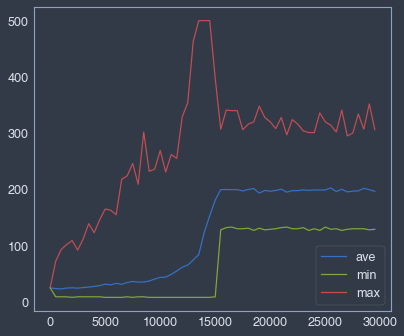

In [9]:
env = gym.make('CartPole-v1')

EPISODES = 30000
RENDER_INTERVAL = 500
gamma = 0.8 #discount
alpha = 0.2 #learning rate
buckets = [4, 6]
rewards = []
metrics = { 'ep': [], 'max': [], 'ave': [], 'min': []}

#State spaces
obs3_high = 3.55 #recorded manually to limit the original -inf to inf range
obs3_low = -3.55
state_space_low = np.array([env.observation_space.low[2], obs3_low]) #[Pole Angle, Pole Velocity] 
state_space_high = np.array([env.observation_space.high[2], obs3_high])

#Discretization of continuous environment values
window_size = np.abs(state_space_high - state_space_low)

def discretize(state):
    state_discrete = ((state - state_space_low) / window_size) * np.array(buckets)
    return tuple(state_discrete.astype(int))

#Initiate Q-table
q_table = np.zeros((5, 6, 2))
#q_table = np.random.uniform(low = -2, high = 0, size=(7, 13, 2))

#Epsilon greedy strategy
epsilon = 1
epsilon_decay_end = EPISODES * 0.5
epsilon_decay_rate = epsilon / epsilon_decay_end

for episode in range(EPISODES):
    
    if not episode % RENDER_INTERVAL:
        render = True
    else:
        render = False
    
    #initialize current state
    s = discretize(env.reset()[np.arange(4) > 1])
    
    ep_reward = 0
    
    for t in range(500):
        
        if np.random.uniform() <= epsilon:
            action = np.random.randint(2)
        else:
            action = np.argmax(q_table[s])
    
        #Calculate new state
        obs, r, done, _ = env.step(action)
        s_new = discretize(obs[np.arange(4) > 1])
        
        ep_reward += r
        
        if render:
            env.render()
        
        #Update Q-value using Bellman's Equation 
        q_table[s + (action,)] = (1-alpha) * q_table[s + (action,)] + alpha * (r + gamma * np.max(q_table[s_new]))

        #Update current state
        s = s_new
        
        if done:
            break
        
    #Update epsilon
    if episode < epsilon_decay_end:
        epsilon -= epsilon_decay_rate
    elif episode == epsilon_decay_end:
        print('Epsilon has fully decayed')

    #Rewards tracker
    rewards.append(ep_reward)
        
    if not episode % RENDER_INTERVAL:
        metrics['ep'].append(episode)
        score_max = np.max(rewards[-RENDER_INTERVAL:])
        metrics['max'].append(score_max)
        score_ave = np.average(rewards[-RENDER_INTERVAL:])
        metrics['ave'].append(score_ave)
        score_min = np.min(rewards[-RENDER_INTERVAL:])
        metrics['min'].append(score_min)
        print('Episode: {}, Max: {}, Ave: {}, Min: {}'.format(episode, score_max, score_ave, score_min))
              
print('Session Done!')
env.close()

plt.plot(metrics['ep'], metrics['ave'], Label="ave")
plt.plot(metrics['ep'], metrics['min'], Label="min")
plt.plot(metrics['ep'], metrics['max'], Label="max")
plt.legend(loc=4)
plt.show()

In [17]:
q_table

array([[[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[1.05644573, 1.04301396],
        [4.47558632, 3.24475132],
        [5.        , 5.        ],
        [5.        , 5.        ],
        [4.64465065, 4.88494118],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [4.79201608, 4.74468051],
        [5.        , 5.        ],
        [5.        , 5.        ],
        [3.30609156, 4.58417436],
        [1.06788797, 2.36353599]],

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
      